### 1. 여러개의 그래프

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

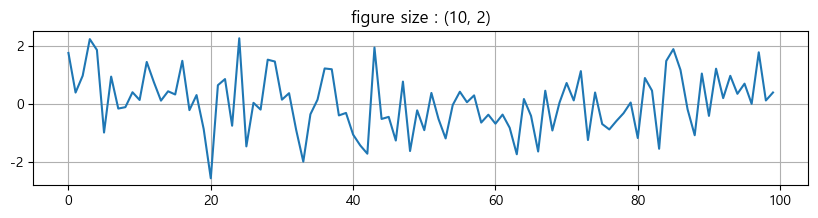

In [3]:
np.random.seed(0)
plt.figure(figsize=(10, 2))
plt.title("figure size : (10, 2)")
plt.plot(np.random.randn(100)), plt.grid()
plt.show()

- subplot()

In [5]:
from PIL import Image
img1 = Image.open('data/output.png')
img2 = Image.open('data/삼각함수.png')


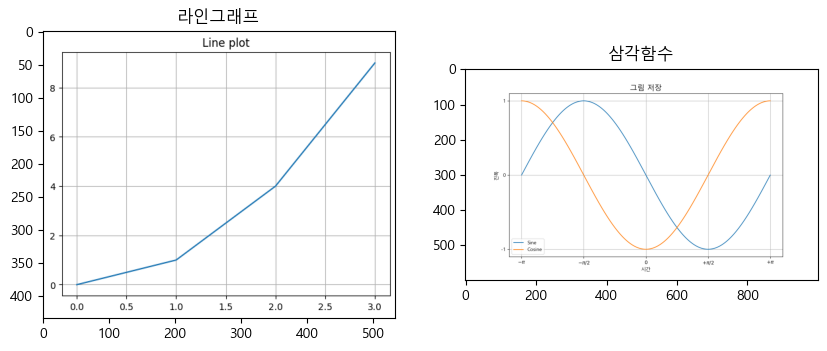

In [6]:
# subplot(a,b,c) : a개의 행, b개의 열, c순서
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img1),plt.title('라인그래프')
plt.subplot(122)
plt.imshow(img2), plt.title('삼각함수')
plt.show()

- Anscombe's Quartet

In [7]:
ans = sns.load_dataset('anscombe')
ans.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


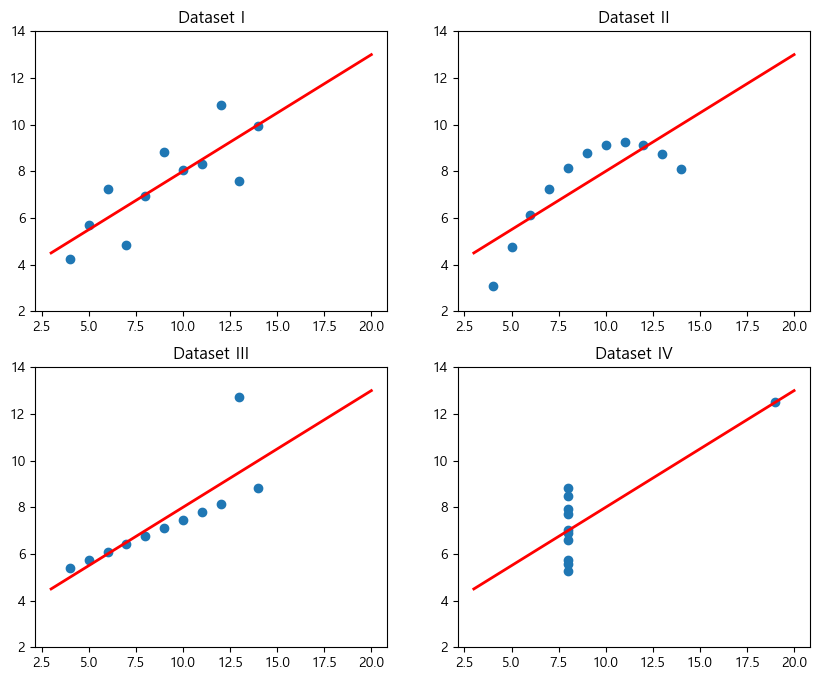

In [33]:
plt.figure(figsize=(10,8))

for index, roman in enumerate(ans.dataset.unique()):
    ds = ans[ans.dataset == roman]
    plt.subplot(2, 2, index+1)
    plt.ylim(2,14)
    plt.scatter(ds.x, ds.y, marker='o')
    plt.plot([3,20], [4.5,13], 'r-', lw=2)        # y = 0.5 * x  + 3
    plt.title(f'Dataset {roman}')
plt.show()

- subplots()

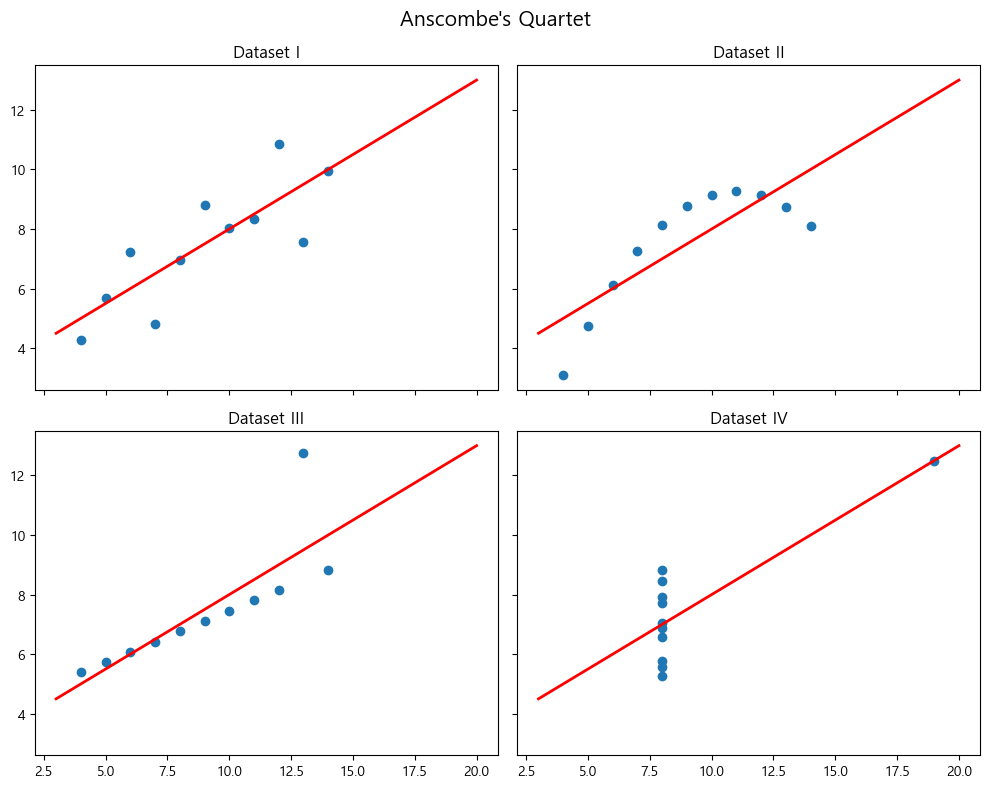

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(10,8), sharex=True, sharey=True)
for index, roman in enumerate(ans.dataset.unique()):
    ds = ans[ans.dataset == roman]
    ax = axes[index//2, index%2]       # row index, column index
    ax.scatter(ds.x, ds.y, marker='o')
    ax.plot([3,20], [4.5,13], 'r-', lw=2)        # y = 0.5 * x  + 3
    ax.set_title(f'Dataset {roman}')

fig.suptitle("Anscombe's Quartet", fontsize=15)
plt.tight_layout()
plt.show()

- Axis 객체와 축

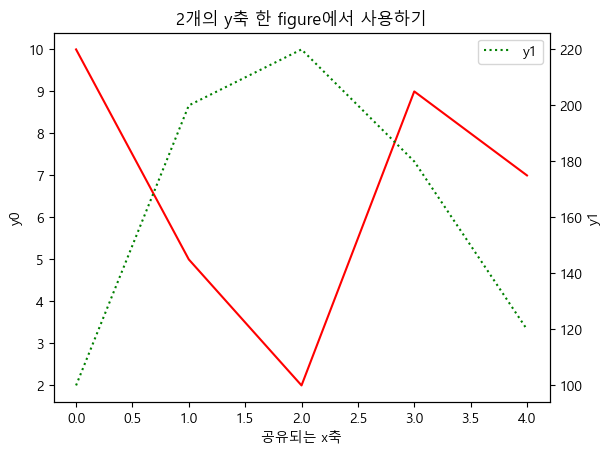

In [32]:
fig, ax0 = plt.subplots()
ax1 = ax0.twinx()
ax0.set_title("2개의 y축 한 figure에서 사용하기")
ax0.plot([10, 5, 2, 9, 7], 'r-', label="y0")
ax0.set_ylabel("y0")
ax1.plot([100, 200, 220, 180, 120], 'g:', label="y1")
ax1.set_ylabel("y1")
ax0.set_xlabel("공유되는 x축")
plt.legend()
plt.show()

- 갤러리의 그래프를 그려보기

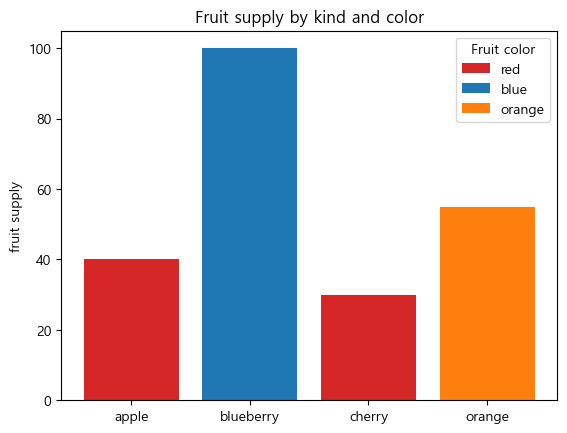

In [10]:
fig, ax = plt.subplots()

fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

plt.bar(fruits, counts, label=bar_labels, color=bar_colors)

plt.ylabel('fruit supply')
plt.title('Fruit supply by kind and color')
plt.legend(title='Fruit color')

plt.show()

- Iris 모든 품종의 특성에 대한 박스플롯을 하나의 그래프 안에 넣기

In [11]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

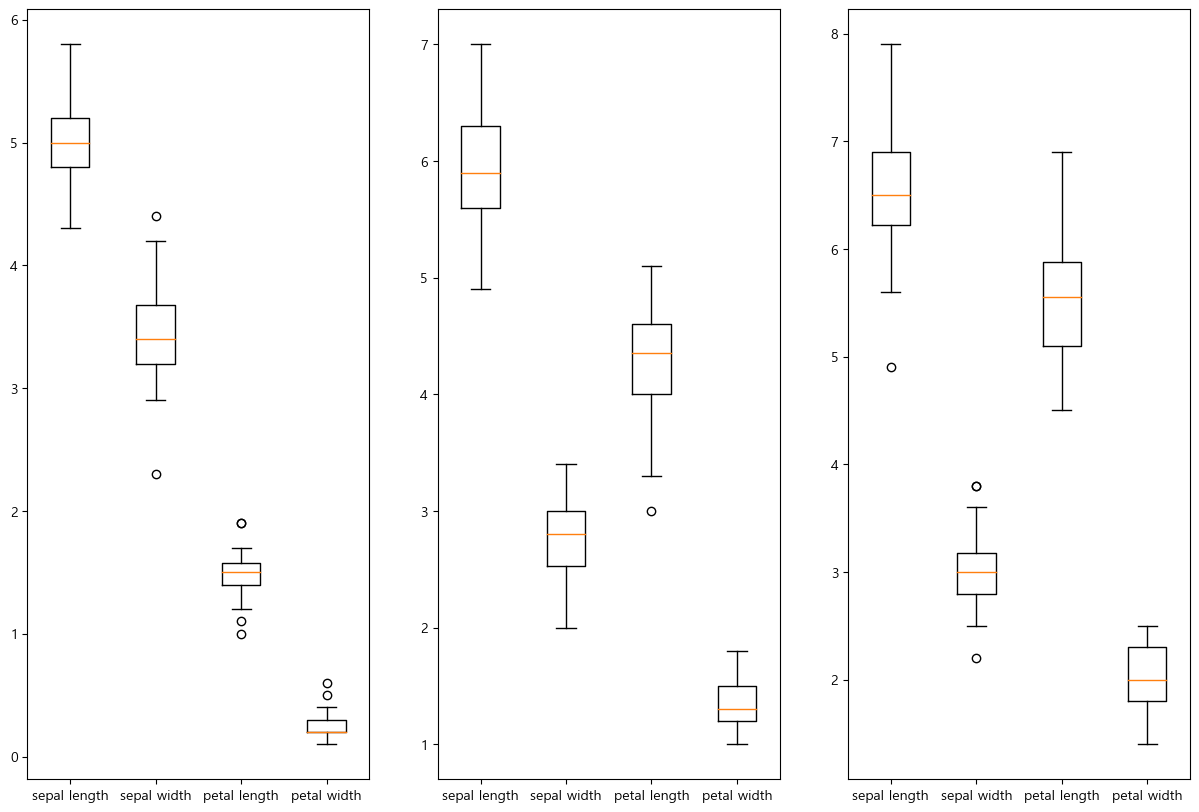

In [24]:
plt.figure(figsize=(15,10))

plt.subplot(1,3,1)
ssl = iris[iris.species == 'setosa'].sepal_length
ssw = iris[iris.species == 'setosa'].sepal_width
spl = iris[iris.species == 'setosa'].petal_length
spw = iris[iris.species == 'setosa'].petal_width
plt.boxplot((ssl, ssw, spl, spw), labels=['sepal length','sepal width', 'petal length', 'petal width'])

plt.subplot(1,3,2)
vsl = iris[iris.species == 'versicolor'].sepal_length
vsw = iris[iris.species == 'versicolor'].sepal_width
vpl = iris[iris.species == 'versicolor'].petal_length
vpw = iris[iris.species == 'versicolor'].petal_width
plt.boxplot((vsl, vsw, vpl, vpw), labels=['sepal length','sepal width', 'petal length', 'petal width'])

plt.subplot(1,3,3)
visl = iris[iris.species == 'virginica'].sepal_length
visw = iris[iris.species == 'virginica'].sepal_width
vipl = iris[iris.species == 'virginica'].petal_length
vipw = iris[iris.species == 'virginica'].petal_width
plt.boxplot((visl, visw, vipl, vipw), labels=['sepal length','sepal width', 'petal length', 'petal width'])

plt.show()

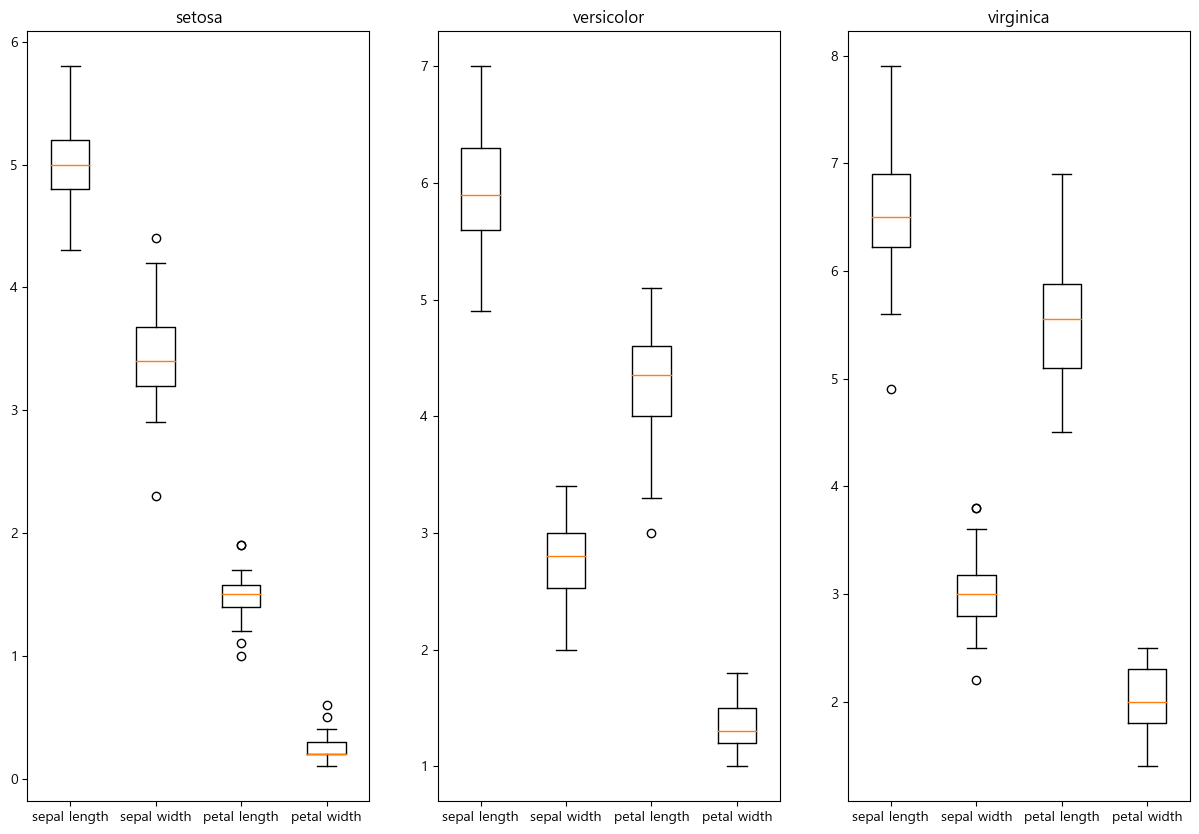

In [28]:
plt.figure(figsize=(15,10))
for index, species in enumerate(iris.species.unique()):
    sl = iris[iris.species == species].sepal_length
    sw = iris[iris.species == species].sepal_width
    pl = iris[iris.species == species].petal_length
    pw = iris[iris.species == species].petal_width
    plt.subplot(1,3,index+1)
    plt.boxplot((sl,sw,pl,pw)
                ,labels=['sepal length','sepal width', 'petal length', 'petal width'])
    plt.title(species)

plt.show()

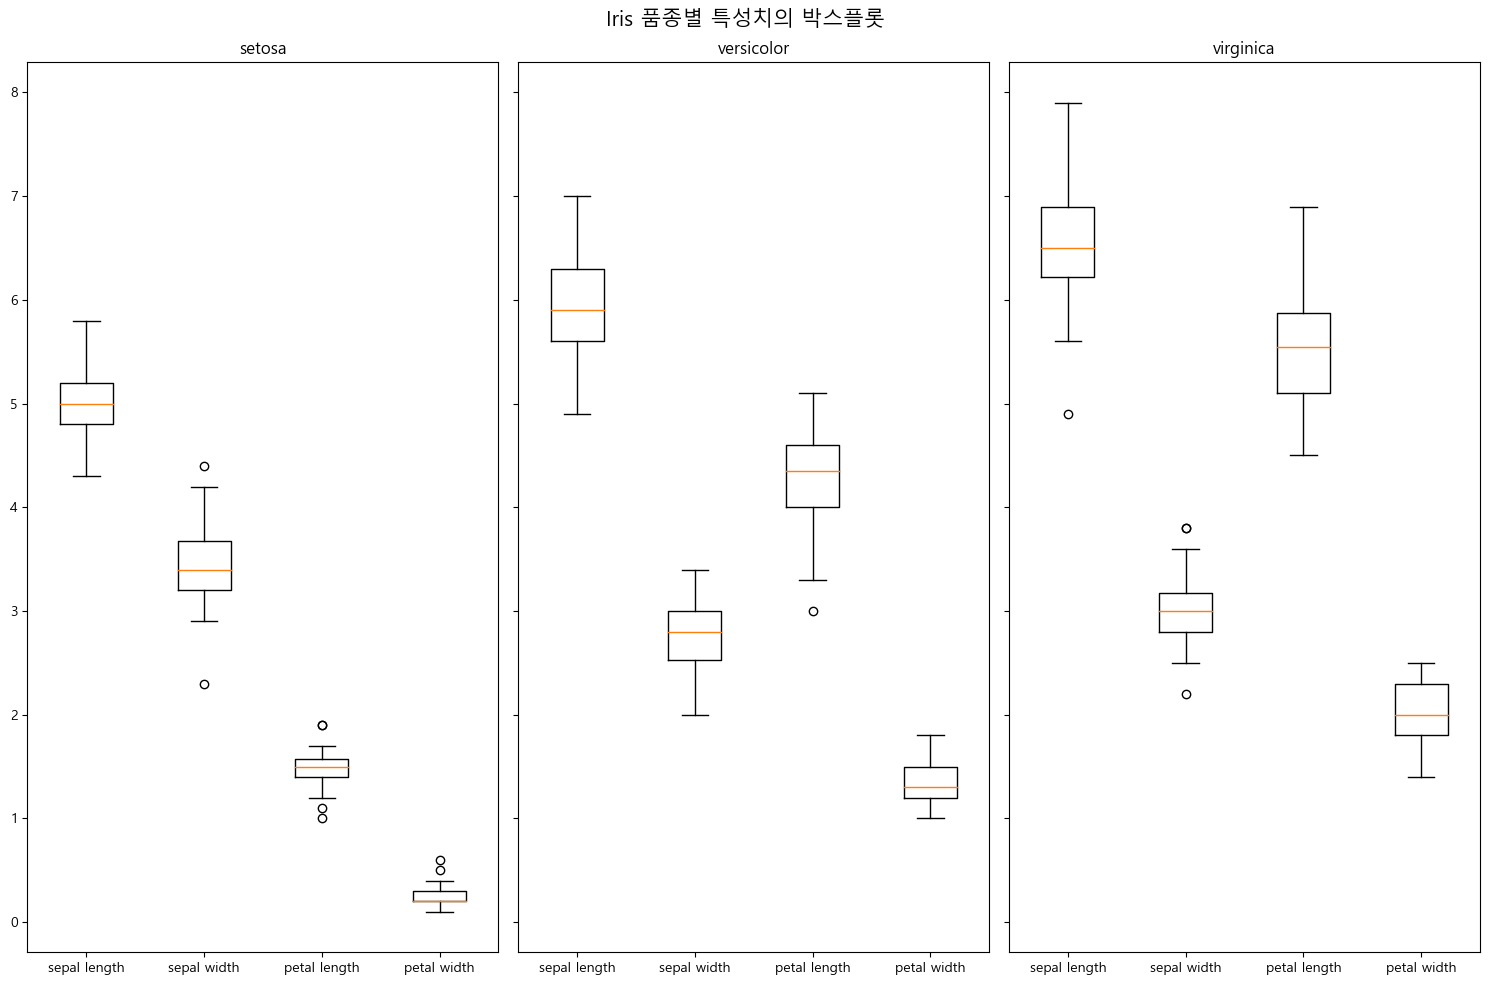

In [30]:
fig, axes = plt.subplots(1,3,figsize=(15,10),sharey=True)
for index, species in enumerate(iris.species.unique()):
    sl = iris[iris.species == species].sepal_length
    sw = iris[iris.species == species].sepal_width
    pl = iris[iris.species == species].petal_length
    pw = iris[iris.species == species].petal_width
    ax = axes[index]
    ax.boxplot((sl,sw,pl,pw)
                ,labels=['sepal length','sepal width', 'petal length', 'petal width'])
    ax.set_title(species)

fig.suptitle("Iris 품종별 특성치의 박스플롯", fontsize=15)
plt.tight_layout()
plt.show()